In [1]:

import matplotlib.pyplot as plt

import pandas as pd
import time

from alphabt import *


# 作多

In [17]:

Data.datasource = 'yfapi'
data = Data().get_data(ticker='T', startdate='2000', enddate='2020')

# 回測策略:
  * 5MA、25MA 黃金交叉 以及 成交量大於20MA成交量
  * 5MA、25MA 死叉

### 單純作多

In [3]:


class _250MA(Strategy):
    
    def __init__(self):
        self.data = data
        self.vol_20 = self.data.volume.rolling(20).mean().values
        self.ma25 = self.indicator('MA', 25)['MA'].values
        self.ma5 = self.indicator('MA', 5)['MA'].values

        
    def signal(self, index):
        super().signal(index)

        buy_con = (self.ma25[index - 1] > self.ma5[index - 1]) & (self.ma25[index] < self.ma5[index]) & (self.data.volume[index] >= self.vol_20[index])
                   
        sell_con = (self.ma25[index - 1] < self.ma5[index - 1]) & (self.ma25[index] > self.ma5[index])
        
        if (buy_con) & (self.empty_position):
#             print(11111)
            self.long()
            
        if (sell_con) :

            self.close()
        
    
    



In [4]:
%%time
bt = Backtest(_250MA, initital_equity=10000, commission=None)
bt.run()


CPU times: user 873 ms, sys: 2.46 ms, total: 875 ms
Wall time: 875 ms


In [5]:
trading_report, yearly_report = bt.get_report(True)



/Users/apple/Documents/PythonProject/alphabt/alphabt/common/statistic.py:118: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



-----------------------------|
sharpe ratio | -0.754 --------|
-----------------------------|
calmar ratio | -0.001 --------|
-----------------------------|


/Users/apple/Documents/PythonProject/alphabt/alphabt/report/report.py:83: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [12]:
# trading_report

In [7]:
trading_report[trading_report.ExitDate == '2019-04-26']

Ticket  unit action  EntryDate  EntryPrice  EntryCommission    Type  \
65      T     1   long 2019-03-18       23.17              0.0  normal   

     ExitDate  ExitPrice  Tax  ExitCommission    Equity  DurationDate  \
65 2019-04-26      23.01  0.0             0.0  9980.521            39   

    profit($)    ROI(%)  AccumulateROI(%)  MDD(%)  EquityReturn  \
65      -0.16 -0.690548           -49.392   6.329        -0.002   

    EquityAccumulateReturn  
65                   -0.19

In [19]:
Data.datasource = 'yfapi'
data = Data().get_data(ticker='^GSPC', startdate='2000', enddate='2020')['close']

In [20]:
'2019-04-26' in data.index

True

In [21]:
data

2000-01-03    1455.219971
2000-01-04    1399.420044
2000-01-05    1402.109985
2000-01-06    1403.449951
2000-01-07    1441.469971
                 ...     
2019-12-24    3223.379883
2019-12-26    3239.909912
2019-12-27    3240.020020
2019-12-30    3221.290039
2019-12-31    3230.780029
Name: close, Length: 5031, dtype: float64

In [16]:
yearly_report

年度總損益(元)  作多次數(次)  作空次數(次)  交易總次數(次)   勝率(%)         獲利因子  最大損失(元)  \
2000     -6.03        3        0         3    0.00        0.000     -3.0   
2001     -2.82        3        0         3   33.33        0.359     -3.0   
2002     -3.23        2        0         2    0.00        0.000     -2.0   
2003     -1.10        4        0         4   25.00        0.076     -1.0   
2004     -2.22        6        0         6   33.33        0.402     -2.0   
2005     -1.72        8        0         8    0.00        0.000     -1.0   
2006      3.96        4        0         4   75.00       12.647     -0.0   
2007      0.03        3        0         3   33.33        1.024     -1.0   
2008     -3.87        4        0         4   25.00        0.128     -2.0   
2009     -0.80        4        0         4   50.00        0.292     -1.0   
2010      2.34        2        0         2  100.00  2340000.000      0.0   
2011      1.12        4        0         4   50.00        2.204     -1.0   
2012      2.00        3        0         3   33.33        4.390     -0.0   
2013      1.02        3        0         3   66.67        1.919     -1.0   
2014     -1.81        2        0         2    0.00        0.000     -1.0   
2015      0.00        2        0         2   50.00        1.000     -0.0   
2016      2.52        2        0         2   50.00       13.600     -0.0   
2017     -4.09        3        0         3    0.00        0.000     -2.0   
2018     -4.60        3        0         3    0.00        0.000     -2.0   
2019      1.87        3        0         3   33.33        4.667     -0.0   

      最大獲利(元) 個股年度報酬(%)  當年度報酬率(%)  平均交易報酬率(%)  累積年度報酬(%)  當年度權益報酬率(%)  \
2000      0.0     -1.67     -16.67       -5.56     -16.67        -0.06   
2001      2.0    -17.65      -7.36       -2.45     -22.80        -0.03   
2002      0.0    -30.93     -11.22       -5.61     -31.46        -0.03   
2003      0.0     -6.56      -5.84       -1.46     -35.46        -0.01   
2004      1.0     -1.15     -10.78       -1.80     -42.42        -0.02   
2005      0.0     -5.74      -9.03       -1.13     -47.62        -0.02   
2006      3.0     45.98      19.14        4.78     -37.60         0.04   
2007      1.0     16.51       0.28        0.09     -37.43         0.00   
2008      1.0    -31.34     -13.56       -3.39     -45.91        -0.04   
2009      0.0     -2.47      -4.23       -1.06     -48.20        -0.01   
2010      2.0      3.41      12.16        6.08     -41.90         0.02   
2011      2.0      1.89       4.80        1.20     -39.10         0.01   
2012      3.0     10.67       8.42        2.81     -33.98         0.02   
2013      2.0      2.24       3.63        1.21     -31.58         0.01   
2014      0.0     -4.68      -6.57       -3.29     -36.07        -0.02   
2015      0.0      2.44      -0.06       -0.03     -36.11        -0.00   
2016      3.0     24.79       9.57        4.78     -30.00         0.02   
2017      0.0     -8.92     -13.14       -4.38     -39.19        -0.04   
2018      0.0    -26.93     -16.19       -5.40     -49.04        -0.04   
2019      2.0     37.12       7.08        2.36     -45.43         0.02   

      權益累積年度報酬(%)    權益  年化報酬率(%)  權益年化報酬率(%)  大盤年化報酬率(%)  
2000        -0.06  9994    -16.67       -0.06       -9.27  
2001        -0.09  9991    -12.14       -0.05      -11.18  
2002        -0.12  9988    -11.83       -0.04      -15.44  
2003        -0.13  9987    -10.37       -0.03       -6.51  
2004        -0.15  9985    -10.45       -0.03       -3.59  
2005        -0.17  9983    -10.22       -0.03       -2.52  
2006        -0.13  9987     -6.52       -0.02       -0.37  
2007        -0.13  9987     -5.69       -0.02        0.11  
2008        -0.17  9983     -6.60       -0.02       -5.16  
2009        -0.18  9982     -6.37       -0.02       -2.63  
2010        -0.15  9985     -4.82       -0.01       -1.32  
2011        -0.14  9986     -4.05       -0.01       -1.21  
2012        -0.12  9988     -3.14       -0.01       -0.15  
2013        -0

In [14]:
# per

In [15]:
bt.get_plot(subplot_technical_index=['MA'], overlap=['TEMA'], sub_plot_param={'MA':[5, 25]}, overlap_param=None, log=trading_report)


/Users/apple/Documents/PythonProject/alphabt/alphabt/common/plot.py:81: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/apple/Documents/PythonProject/alphabt/alphabt/common/plot.py:82: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/apple/Documents/PythonProject/alphabt/alphabt/common/plot.py:104: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



2000 2019
False
True


KeyError: "[Timestamp('2019-04-26 00:00:00'), Timestamp('2019-10-11 00:00:00'), Timestamp('2019-11-22 00:00:00')] not in index"

# 回測策略:
  * 前一天收盤價大於5ma
  * 5MA、25MA 死叉

### 作多 + 加倉

In [ ]:

class _250MA2(Strategy):
    
    def __init__(self):
        self.data = data
        self.vol_20 = self.data.volume.rolling(20).mean().values
        self.ma25 = self.indicator('MA', 25)['MA'].values
        self.ma5 = self.indicator('MA', 5)['MA'].values
        
        self.long_count = 0
        self.close_count = 0

        
    def signal(self, i):
        super().signal(i)
        buy_con = (self.data.close.values[i - 1] > self.ma5[i - 1]) #& (self.ma25[i] < self.ma5[i]) & (self.data.volume[i] >= self.vol_20[i])
                   
        sell_con = (self.ma25[i - 1] < self.ma5[i - 1]) & (self.ma25[i] > self.ma5[i])
        
        if (buy_con) :

#             self.long()
            self.long(stop_loss=0.08)

            
        if (sell_con) :
          
            self.close()
        


In [ ]:
pd.DataFrame([{'a':1}])

In [ ]:
%%time
bt = Backtest(_250MA2, initital_equity=10000, commission=0.01)
bt.run()


In [ ]:
trading_report2, yearly_report2= bt.get_report()

In [ ]:
data

In [ ]:
data.apply(lambda x: x['low'] + 1 if x['close'] > 30 else x['low'] - 1, axis=1)


In [23]:
per2

年度總損益(元)  作多次數(次)  作空次數(次)  交易總次數(次)  勝率(%)    獲利因子  最大損失(元)   最大獲利(元)  \
2000 -110487.38       10        0        10  30.00   0.756 -99998.0  254467.0   
2001  -55392.07        7        0         7  42.86   0.556 -61330.0   43258.0   
2002 -172368.48        9        0         9  22.22   0.428 -88586.0   75933.0   
2003 -128982.27       10        0        10  20.00   0.506 -65295.0  116517.0   
2004   21091.09        8        0         8  50.00   1.270 -38501.0   48124.0   
2005  -35012.33       14        0        14  14.29   0.366 -14820.0   14720.0   
2006  103324.18        6        0         6  50.00   3.097 -24809.0  105353.0   
2007   45715.27        9        0         9  66.67   1.469 -74206.0   45094.0   
2008 -179132.79       12        0        12  33.33   0.312 -64947.0   37657.0   
2009  -48931.44        9        0         9  44.44   0.611 -46186.0   38223.0   
2010   61974.29        5        0         5  60.00   2.516 -35371.0   73919.0   
2011  -31438.50       10        0        10  30.00   0.608 -35130.0   45778.0   
2012   43954.26        8        0         8  50.00   1.794 -37330.0   74812.0   
2013    -266.79        7        0         7  28.57   0.997 -31676.0   51255.0   
2014   14976.17        9        0         9  33.33   1.206 -21040.0   46894.0   
2015  -19935.49        4        0         4  25.00   0.604 -29191.0   30360.0   
2016  107125.05        5        0         5  80.00   6.787 -18513.0   67783.0   
2017  -61105.83        6        0         6  66.67   0.316 -56565.0   20236.0   
2018 -105844.01       10        0        10  30.00   0.340 -57515.0   52309.0   
2019   85229.87        7        0         7  85.71  14.087  -6513.0   54050.0   
2020 -151175.53       10        0        10  20.00   0.088 -51206.0    7542.0   

     個股年度報酬(%)  當年度報酬率(%)  平均交易報酬率(%)  累積年度報酬(%)  當年度權益報酬率(%)  權益累積年度報酬(%)  \
2000     -1.67     -11.05       -1.10     -11.05       -11.05       -11.05   
2001    -17.64      -6.23       -0.89     -16.59        -6.23       -16.59   
2002    -30.93     -20.67       -2.30     -33.82       -20.66       -33.82   
2003     -6.56     -19.49       -1.95     -46.72       -19.49       -46.72   
2004     -1.15       3.96        0.50     -44.61         3.96       -44.61   
2005     -5.74      -7.23       -0.52     -48.62        -6.32       -48.12   
2006     45.98      19.92        3.32     -38.39        19.91       -37.78   
2007     16.51       7.35        0.82     -33.86         7.35       -33.21   
2008    -31.34     -26.41       -2.20     -51.33       -26.82       -51.12   
2009     -2.47     -10.01       -1.11     -56.20       -10.01       -56.02   
2010      3.41      14.09        2.82     -50.03        14.09       -49.82   
2011      1.89      -6.27       -0.63     -53.16        -6.27       -52.96   
2012     10.67       9.35        1.17     -48.78         9.34       -48.57   
2013      2.24      -2.40       -0.34     -50.01        -0.05       -48.60   
2014     -4.68       2.91        0.32     -48.56         2.91       -47.10   
2015      2.44      -3.77       -0.94     -50.50        -3.77       -49.09   
2016     24.79      21.04        4.21     -40.08        21.04       -38.38   
2017     -8.92      -9.92       -1.65     -46.02        -9.92       -44.49   
2018    -26.93     -21.34       -2.13     -57.54       -19.07       -55.07   
2019     37.12      18.97        2.71     -49.49        18.97       -46.55   
2020    -26.56     -28.29       -2.83     -63.78       -28.28       -61.67   

          權益  年化報酬率(%)  權益年化報酬率(%)  大盤年化報酬率(%)  
2000  889513    -11.05      -11.05       -9.27  
2001  834121     -8.67       -8.67      -11.18  
2002  661752    -12.86      -12.86      -15.44  
2003  532770    -14.56      -14.56       -6.51  
2004  553861    -11.14      -11.14       -3.59  
2005  518849    -10.50      -10.36       -2.52  
2006  622173     -6.69       -6.55       -0.37  
2007  667888     -5.04       -4.92        0.11  
2008  488755     -7.69       -7.65       -5.16  
2009  439824     

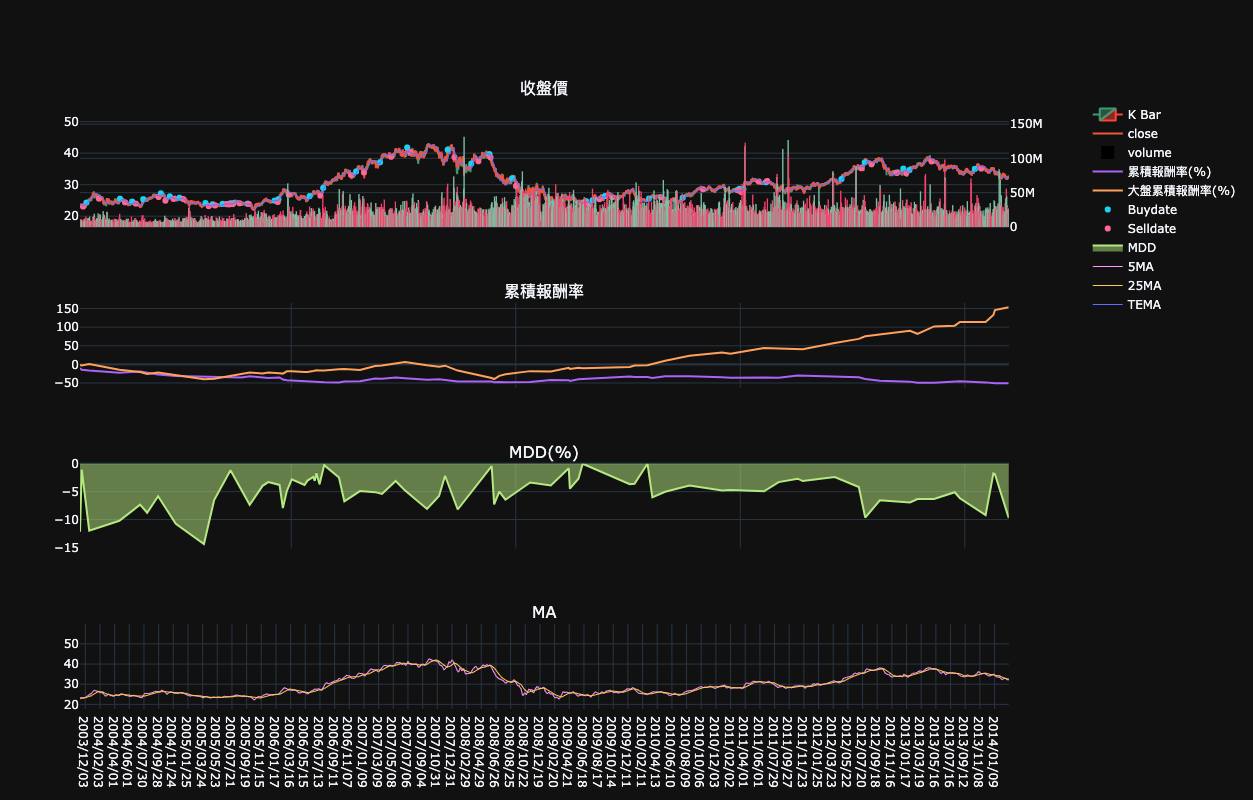

In [24]:
Bt(_250MA2).get_plot(subplot_technical_index=['MA'], overlap=['TEMA'], sub_plot_param={'MA':[5, 25]}, overlap_param=None, log=log)
